In [58]:
Project = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Projects/Adipocyte'

from IPython.display import display
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
from math import log10

plt.rcParams.update(plt.rcParamsDefault)

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

plt.rcParams['ps.useafm']=True
plt.rcParams['pdf.fonttype']=42

plt.rc('font', size=7)          # controls default text sizes
plt.rc('axes', titlesize=7)     # fontsize of the axes title
plt.rc('axes', labelsize=7)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=6)    # fontsize of the tick labels
plt.rc('ytick', labelsize=6)    # fontsize of the tick labels
plt.rc('legend', fontsize=6)    # legend fontsize
suptitlesize = 7

plt.rc('axes', axisbelow=True) #push axes to back
mpl.rcParams['axes.linewidth'] = 0.5

In [59]:
with open(f'{Project}/Results/Tables/GSEA/v20240502/adi_logRD_temporal_GO.pickle',"rb") as fr:
    total_data = pickle.load(fr)

raw_data = total_data
for cond in raw_data:
    raw_data[cond]['name'] = [x[5:] for x in raw_data[cond]['Term']]
    raw_data[cond]['name'] = raw_data[cond]['name'].str.replace('_', ' ').str.capitalize()

display(raw_data['8'])

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes,N,name
0,prerank,GOCC_INNER_MITOCHONDRIAL_MEMBRANE_PROTEIN_COMPLEX,-0.61053,-2.651371,0.0,0.0,0.0,86/141,19.64%,Chchd3;Atp5g1;Cox8b;Uqcrb;mt-Cytb;Ndufa4;Timm1...,11808,Inner mitochondrial membrane protein complex
1,prerank,GOCC_RESPIRASOME,-0.642963,-2.592375,0.0,0.0,0.0,59/89,19.74%,Cox8b;Uqcrb;mt-Cytb;Ndufa4;Ndufb7;Uqcc3;Cox7b;...,11808,Respirasome
2,prerank,GOCC_NADH_DEHYDROGENASE_COMPLEX,-0.701978,-2.517026,0.0,0.0,0.0,34/48,16.84%,Ndufa4;Ndufb7;Ndufb4;mt-Nd5;Ndufa13;Ndufs6;mt-...,11808,Nadh dehydrogenase complex
3,prerank,GOBP_PROTON_MOTIVE_FORCE_DRIVEN_ATP_SYNTHESIS,-0.624728,-2.382318,0.0,0.0,0.0,44/67,20.48%,Atp5g1;Ndufb7;Ndufb4;mt-Nd5;Ndufa13;Ndufs6;Ant...,11808,Proton motive force driven atp synthesis
4,prerank,GOBP_OXIDATIVE_PHOSPHORYLATION,-0.532624,-2.294615,0.0,0.000737,0.003333,67/135,16.84%,Cox8b;Uqcrb;mt-Cytb;Ndufb7;Uqcc2;Uqcc3;Ndufb4;...,11808,Oxidative phosphorylation
...,...,...,...,...,...,...,...,...,...,...,...,...
4660,prerank,GOMF_O_METHYLTRANSFERASE_ACTIVITY,0.158638,0.429016,0.998929,1.0,1.0,5/20,25.88%,Mrm1;Icmt;Pcmtd2;Cmtr2;Cmtr1,11808,O methyltransferase activity
4661,prerank,GOBP_POSITIVE_REGULATION_OF_BONE_MINERALIZATION,0.138472,0.424219,0.999482,1.0,1.0,7/35,27.88%,Ano6;Smad3;Ptn;Fbn2;P2rx7;Tmem119;Acvr1,11808,Positive regulation of bone mineralization
4662,prerank,GOBP_CELL_DIFFERENTIATION_INVOLVED_IN_EMBRYONI...,0.15323,0.412124,0.997821,1.0,1.0,2/20,15.96%,Stk4;Plk4,11808,Cell differentiation involved in embryonic pla...
4663,prerank,GOBP_NEGATIVE_REGULATION_OF_RESPONSE_TO_ENDOPL...,0.12953,0.403089,1.0,0.999866,1.0,10/38,29.29%,Lpcat3;Syvn1;Ikbkg;Hyou1;Aqp11;Nck2;Tmbim6;Prk...,11808,Negative regulation of response to endoplasmic...


---

In [60]:
import csv

gmt_path = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Data_Library/GSEA/gmt/m5.go.v2023.1.Mm.symbols.gmt'

gmt = {}
rf = open(gmt_path)
reader = csv.reader(rf, delimiter='\t')
for line in reader:
    gmt[line[0]] = line[2:]
rf.close()

In [61]:
CHIP = pd.read_csv('/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Data_Library/GSEA/chip/Mouse_Ensembl_Gene_ID_MSigDB.v2023.2.Mm.chip', sep='\t', usecols=['Probe Set ID','Gene Symbol']).rename(columns={'Probe Set ID':'gene_id', 'Gene Symbol':'gene_name'})
# display(CHIP)

---

In [62]:
RD_avglogFC = pd.read_csv(f'{Project}/Results/Tables/CPM_RD_calculation/v20221217/adi_RD_avg_log2FC.tsv', sep='\t').drop(columns='gene_name')

display(RD_avglogFC)

,gene_id,D4,D8
0,ENSMUSG00000033845,-0.311108,-0.382188
1,ENSMUSG00000025903,0.143887,-0.212839
2,ENSMUSG00000033813,0.151689,0.189858
3,ENSMUSG00000033793,0.269876,0.283882
4,ENSMUSG00000025907,0.088801,-0.326082
...,...,...,...
11805,ENSMUSG00000064360,-0.227778,-2.407071
11806,ENSMUSG00000064363,-1.022871,-1.317163
11807,ENSMUSG00000064367,-0.418699,-0.569325
11808,ENSMUSG00000064368,-0.609004,-0.318614


In [63]:
data_dict = {}
for day in raw_data:
    tmp = raw_data[day][['Term','NES','FDR q-val','Tag %']]
    tmp['GS size'] = tmp['Tag %'].str.split('/').str[1].astype(int)
    tmp = tmp.replace(0, 0.0001)
    tmp['-log10FDR'] = -np.log10(tmp['FDR q-val'])
    tmp = tmp.drop(columns=['Tag %','FDR q-val'])

    avg_RD_logFC = []
    for T in tmp['Term']:
        avg_RD_logFC.append((pd.merge(RD_avglogFC, pd.merge(CHIP, pd.DataFrame({'gene_name':gmt[T]}), on='gene_name'), on='gene_id')[f'D{day}']).mean())
    tmp[f'avg_RD_logFC_{day}d'] = avg_RD_logFC

    data_dict[day] = tmp.rename(columns={'NES':f'NES_{day}d', '-log10FDR':f'-log10FDR_{day}d'})


plot_data = pd.merge(data_dict['4'], data_dict['8'], on=['Term','GS size']).sort_values('GS size', ascending=False)
display(plot_data)

/var/folders/ct/z73cq4_j2g5612tltg_pmxxc0000gn/T/ipykernel_24344/1705558967.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['GS size'] = tmp['Tag %'].str.split('/').str[1].astype(int)
/var/folders/ct/z73cq4_j2g5612tltg_pmxxc0000gn/T/ipykernel_24344/1705558967.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['GS size'] = tmp['Tag %'].str.split('/').str[1].astype(int)


,Term,NES_4d,GS size,-log10FDR_4d,avg_RD_logFC_4d,NES_8d,-log10FDR_8d,avg_RD_logFC_8d
2545,GOBP_CHROMATIN_ORGANIZATION,1.099943,499,0.298008,0.063444,1.181993,0.242774,0.057005
543,GOBP_BLOOD_VESSEL_MORPHOGENESIS,1.546298,497,0.775072,0.166886,1.134787,0.213391,0.095649
558,GOBP_RESPONSE_TO_LIPID,1.539873,496,0.768822,0.107563,1.208081,0.258147,0.045824
438,GOBP_CELL_CELL_ADHESION,1.590064,495,0.819313,0.165741,1.292317,0.300036,0.097563
1859,GOCC_NUCLEAR_OUTER_MEMBRANE_ENDOPLASMIC_RETICU...,1.221920,494,0.434198,0.052575,0.865752,0.057529,-0.006844
...,...,...,...,...,...,...,...,...
2889,GOBP_SEQUESTERING_OF_TRIGLYCERIDE,-1.041562,15,0.095586,-0.365155,-0.931870,0.040536,-0.429232
4480,GOBP_PHOSPHATIDYLETHANOLAMINE_METABOLIC_PROCESS,-0.689261,15,0.006258,-0.113392,0.727658,0.016119,-0.119907
2930,GOBP_POSITIVE_REGULATION_OF_CALCINEURIN_MEDIAT...,1.033927,15,0.231423,0.083939,-1.321764,0.205943,-0.038660
1452,GOMF_PROTEIN_SERINE_THREONINE_KINASE_BINDING,1.300463,15,0.520289,0.364828,1.229235,0.270247,0.363887


In [64]:
NoSig_plot_data = plot_data[(plot_data['-log10FDR_4d']<1)&(plot_data['-log10FDR_8d']<1)]
Sig_plot_data = plot_data[(plot_data['-log10FDR_4d']>1)|(plot_data['-log10FDR_8d']>1)].sort_values('-log10FDR_8d', ascending=False).reset_index(drop=True)

display(NoSig_plot_data, Sig_plot_data)

,Term,NES_4d,GS size,-log10FDR_4d,avg_RD_logFC_4d,NES_8d,-log10FDR_8d,avg_RD_logFC_8d
2545,GOBP_CHROMATIN_ORGANIZATION,1.099943,499,0.298008,0.063444,1.181993,0.242774,0.057005
543,GOBP_BLOOD_VESSEL_MORPHOGENESIS,1.546298,497,0.775072,0.166886,1.134787,0.213391,0.095649
558,GOBP_RESPONSE_TO_LIPID,1.539873,496,0.768822,0.107563,1.208081,0.258147,0.045824
438,GOBP_CELL_CELL_ADHESION,1.590064,495,0.819313,0.165741,1.292317,0.300036,0.097563
1859,GOCC_NUCLEAR_OUTER_MEMBRANE_ENDOPLASMIC_RETICU...,1.221920,494,0.434198,0.052575,0.865752,0.057529,-0.006844
...,...,...,...,...,...,...,...,...
2889,GOBP_SEQUESTERING_OF_TRIGLYCERIDE,-1.041562,15,0.095586,-0.365155,-0.931870,0.040536,-0.429232
4480,GOBP_PHOSPHATIDYLETHANOLAMINE_METABOLIC_PROCESS,-0.689261,15,0.006258,-0.113392,0.727658,0.016119,-0.119907
2930,GOBP_POSITIVE_REGULATION_OF_CALCINEURIN_MEDIAT...,1.033927,15,0.231423,0.083939,-1.321764,0.205943,-0.038660
1452,GOMF_PROTEIN_SERINE_THREONINE_KINASE_BINDING,1.300463,15,0.520289,0.364828,1.229235,0.270247,0.363887


,Term,NES_4d,GS size,-log10FDR_4d,avg_RD_logFC_4d,NES_8d,-log10FDR_8d,avg_RD_logFC_8d
0,GOCC_NADH_DEHYDROGENASE_COMPLEX,-2.688557,48,4.000000,-0.403574,-2.517026,4.000000,-0.478681
1,GOBP_PROTON_MOTIVE_FORCE_DRIVEN_ATP_SYNTHESIS,-2.728964,67,4.000000,-0.440799,-2.382318,4.000000,-0.481447
2,GOCC_INNER_MITOCHONDRIAL_MEMBRANE_PROTEIN_COMPLEX,-2.887136,141,4.000000,-0.400969,-2.651371,4.000000,-0.444693
3,GOCC_RESPIRASOME,-2.822744,89,4.000000,-0.421318,-2.592375,4.000000,-0.494971
4,GOBP_OXIDATIVE_PHOSPHORYLATION,-2.737832,135,4.000000,-0.378996,-2.294615,3.132423,-0.382400
...,...,...,...,...,...,...,...,...
58,GOCC_NUCLEOSOME,-1.928245,55,1.264377,-0.391268,0.831278,0.042557,-0.036228
59,GOCC_DNA_PACKAGING_COMPLEX,-1.903672,82,1.244730,-0.263528,-0.930985,0.040829,-0.026581
60,GOBP_MITOCHONDRIAL_TRANSLATION,-1.908914,131,1.244369,-0.085909,-0.845361,0.008990,-0.041565
61,GOCC_MITOCHONDRIAL_SMALL_RIBOSOMAL_SUBUNIT,-1.825933,32,1.039461,-0.122409,-0.627103,0.003483,-0.055732


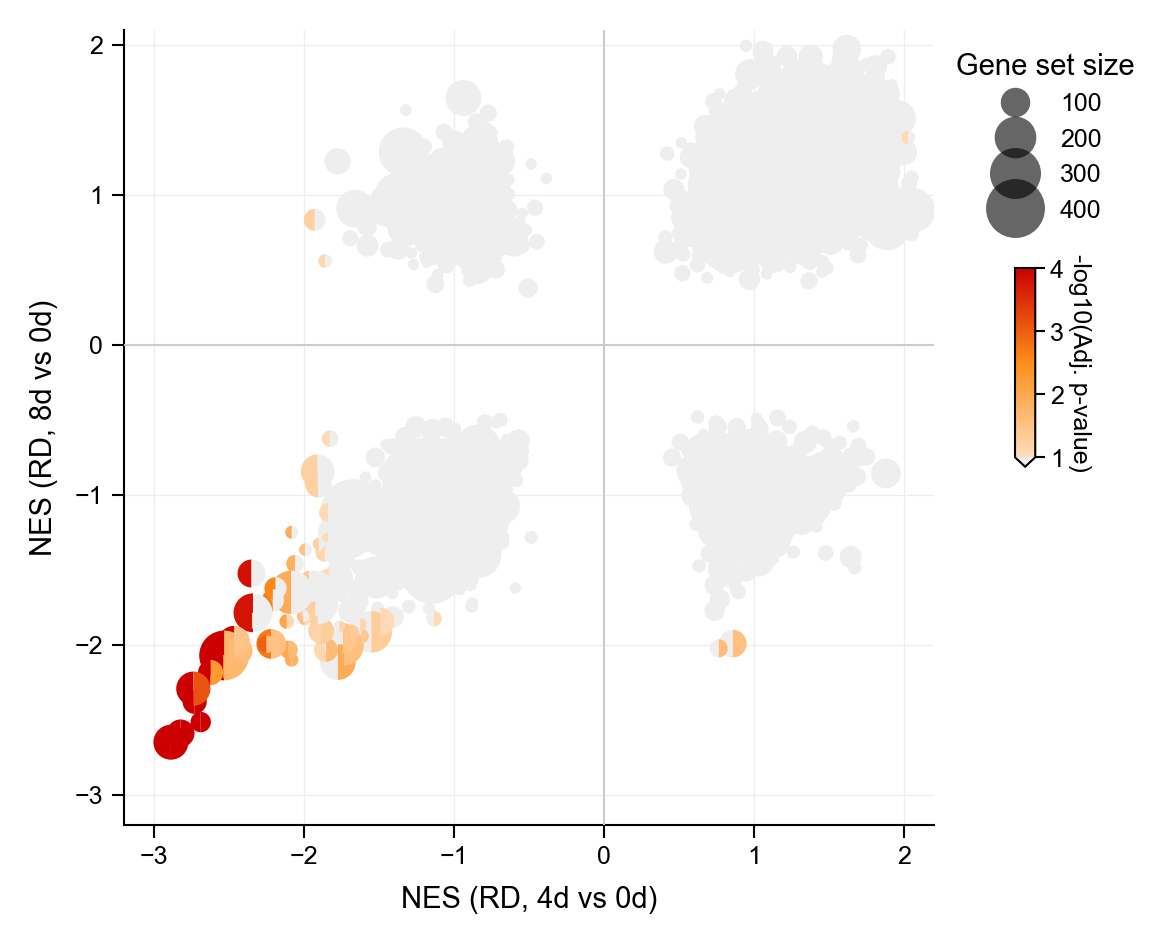

In [65]:
dot_size_factor = 0.5

sF = 1.5 # Size factor
wgap = 0.1
hgap = 0.1
nrow, ncol = 1, 1

height_ratios = [5.3/3]
width_ratios = [5.4/3]

fs_h = sum(np.array(height_ratios)*sF) + (nrow-1)*hgap*sF
fs_w = sum(np.array(width_ratios)*sF) + (ncol-1)*wgap*sF

#
fig = plt.figure(figsize=( fs_w, fs_h ), dpi=300)
grid = plt.GridSpec(nrow, ncol,
                    height_ratios=height_ratios,
                    width_ratios=width_ratios,
                    left=0, right=1, bottom=0, top=1,
                    wspace=wgap, hspace=hgap)

ax = fig.add_subplot(grid[0,0])

vmin, vmax = 1, 4
colors = ['#FFDDBB','#FF8D1A',"#CC0000"]
norm=plt.Normalize(vmin, vmax)
tuples = list(zip(map(norm,[vmin, (vmin+vmax)/2, vmax]), colors))
cmap = mpl.colors.LinearSegmentedColormap.from_list("", tuples)
cmap.set_under('#EEEEEE',vmin)

sct = ax.scatter(NoSig_plot_data['NES_4d'], NoSig_plot_data['NES_8d'],
           s=NoSig_plot_data['GS size']*dot_size_factor, 
           marker='o',
           c='#EEEEEE',
           lw=0, edgecolors='k',
           rasterized=True)

sct_ = ax.scatter(Sig_plot_data['NES_4d'], Sig_plot_data['NES_8d'],
           s=Sig_plot_data['GS size']*dot_size_factor, 
           marker=mpl.markers.MarkerStyle('o', fillstyle='left'),
           c=Sig_plot_data['-log10FDR_4d'], cmap=cmap, vmin=vmin, vmax=vmax,
           lw=0, edgecolors='k')

sct_ = ax.scatter(Sig_plot_data['NES_4d'], Sig_plot_data['NES_8d'],
           s=Sig_plot_data['GS size']*dot_size_factor, 
           marker=mpl.markers.MarkerStyle('o', fillstyle='right'),
           c=Sig_plot_data['-log10FDR_8d'], cmap=cmap, vmin=vmin, vmax=vmax,
           lw=0, edgecolors='k')


ax.set_xlim(-3.2, 2.2)
ax.set_ylim(-3.2, 2.1)
ax.tick_params(width=0.5, length=3, pad=2)

ax.grid(c='#EEEEEE', ls='-', lw=0.3)
ax.axhline(0, c='#CCCCCC', ls='-', lw=0.5, zorder=3)
ax.axvline(0, c='#CCCCCC', ls='-', lw=0.5, zorder=3)

ax.set_xlabel('NES (RD, 4d vs 0d)')
ax.set_ylabel('NES (RD, 8d vs 0d)')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)

cbar = plt.colorbar(sct_, ax=ax, cax = ax.inset_axes([1.1, 0.45, 0.025, 0.25]), orientation='vertical', extend='min')
cbar.set_label('-log10(Adj. p-value)', labelpad=1, fontsize=6, rotation=-90, va='bottom')
cbar.set_ticks([1,2,3,4])
cbar.ax.tick_params(width=0.5, length=2.5, pad=1)

handles, labels = sct.legend_elements(prop="sizes", alpha=0.6, num=5)
labels = [int(int(''.join(i for i in x if i.isdigit())) / dot_size_factor) for x in labels]
ax.legend(handles, labels, loc="upper left", bbox_to_anchor=(1, 1), ncol=1, title="Gene set size", frameon=False)

plt.savefig('GSEA_NES_scatter_type1.pdf', bbox_inches='tight')
plt.show()

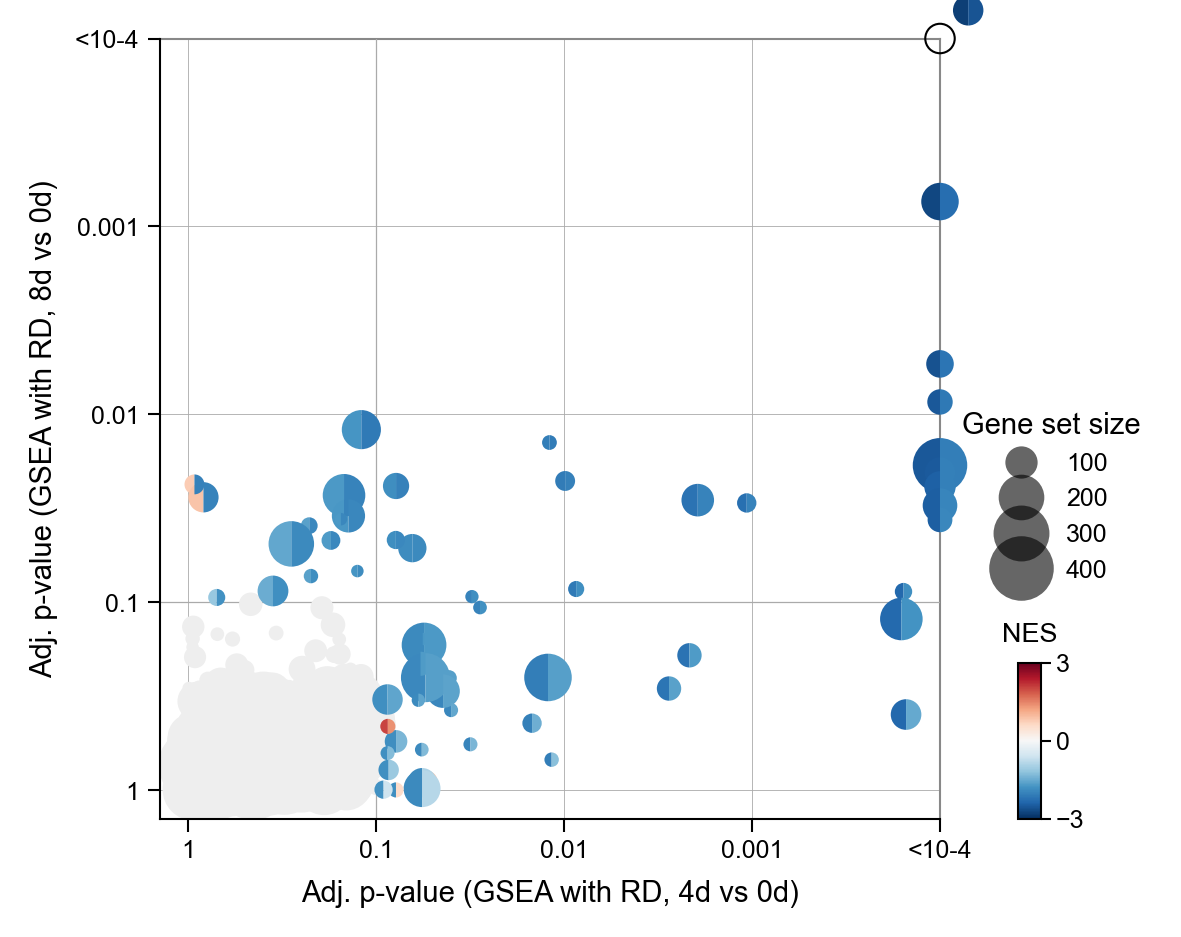

In [74]:
Sig_plot_data2 = Sig_plot_data.copy()

Sig_plot_data2.loc[0, '-log10FDR_8d'] = Sig_plot_data2.loc[0, '-log10FDR_8d'] + 0.75 # NADH dehydrogenase complex
Sig_plot_data2.loc[1, '-log10FDR_8d'] = Sig_plot_data2.loc[1, '-log10FDR_8d'] + 0.55 # Proton motive force driven ATP synthesis
Sig_plot_data2.loc[2, '-log10FDR_8d'] = Sig_plot_data2.loc[2, '-log10FDR_8d'] + 0.35 # IMM protein complex
Sig_plot_data2.loc[3, '-log10FDR_8d'] = Sig_plot_data2.loc[3, '-log10FDR_8d'] + 0.15 # Respirasome

Sig_plot_data2.loc[0, '-log10FDR_4d'] = Sig_plot_data2.loc[0, '-log10FDR_4d'] + 0.15 # NADH dehydrogenase complex
Sig_plot_data2.loc[1, '-log10FDR_4d'] = Sig_plot_data2.loc[1, '-log10FDR_4d'] + 0.15 # Proton motive force driven ATP synthesis
Sig_plot_data2.loc[2, '-log10FDR_4d'] = Sig_plot_data2.loc[2, '-log10FDR_4d'] + 0.15 # IMM protein complex
Sig_plot_data2.loc[3, '-log10FDR_4d'] = Sig_plot_data2.loc[3, '-log10FDR_4d'] + 0.15 # Respirasome


dot_size_factor = 0.6

sF = 0.65 # Size factor
wgap = 0
hgap = 0
nrow, ncol = 1, 1

width_ratios = [4]
height_ratios = [4]

fs_w = sum(np.array(width_ratios)*sF) + (ncol-1)*wgap*sF
fs_h = sum(np.array(height_ratios)*sF) + (nrow-1)*hgap*sF

#
fig = plt.figure(figsize=( fs_w, fs_h ), dpi=300)
grid = plt.GridSpec(nrow, ncol,
                    width_ratios=width_ratios,
                    height_ratios=height_ratios,
                    wspace=wgap/np.average(width_ratios), 
                    hspace=hgap/np.average(height_ratios),
                    left=0, right=1, bottom=0, top=1)

row = 0
col = 0
ax = fig.add_subplot(grid[row,col])

vmin, vmax = -3, 3

ax.axvline(4, c='#888888', ls='-', lw=0.5, zorder=1, clip_on=False)
ax.axhline(4, c='#888888', ls='-', lw=0.5, zorder=1, clip_on=False)
ax.axvline(1, c='#AAAAAA', ls='-', lw=0.3, zorder=1)
ax.axhline(1, c='#AAAAAA', ls='-', lw=0.3, zorder=1)

sct = ax.scatter(NoSig_plot_data['-log10FDR_4d'], NoSig_plot_data['-log10FDR_8d'],
           s=NoSig_plot_data['GS size']*dot_size_factor, 
           marker='o',
           c='#EEEEEE', #"#F6F4EB",
           lw=0, edgecolors='k',
           rasterized=True)

sct_ = ax.scatter(Sig_plot_data2['-log10FDR_4d'], Sig_plot_data2['-log10FDR_8d'],
           s=Sig_plot_data2['GS size']*dot_size_factor, 
           marker=mpl.markers.MarkerStyle('o', fillstyle='left'),
           c=Sig_plot_data2['NES_4d'], cmap="RdBu_r", vmin=vmin, vmax=vmax,
           lw=0, edgecolors='k',
           clip_on=False)

sct_ = ax.scatter(Sig_plot_data2['-log10FDR_4d'], Sig_plot_data2['-log10FDR_8d'],
           s=Sig_plot_data2['GS size']*dot_size_factor, 
           marker=mpl.markers.MarkerStyle('o', fillstyle='right'),
           c=Sig_plot_data2['NES_8d'], cmap="RdBu_r", vmin=vmin, vmax=vmax,
           lw=0, edgecolors='k',
           clip_on=False)

ax.scatter([4],[4], 
           c='none', s=50,
           lw=0.5, edgecolors='k',
           clip_on=False)


ax.set_xlim(-0.15, 4)
ax.set_ylim(-0.15, 4)
ax.set_yticks([0, 1, 2, 3, 4])
ax.set_yticklabels([1, 0.1, 0.01, 0.001, "<10-4"])
ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xticklabels([1, 0.1, 0.01, 0.001, "<10-4"])
ax.tick_params(width=0.5, length=3, pad=2)

ax.grid(c='#AAAAAA', ls='-', lw=0.2)

ax.set_xlabel('Adj. p-value (GSEA with RD, 4d vs 0d)')
ax.set_ylabel('Adj. p-value (GSEA with RD, 8d vs 0d)')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)

cbar = plt.colorbar(sct_, ax=ax, cax = ax.inset_axes([1.1, 0, 0.03, 0.2]), orientation='vertical')
cbar.ax.set_title('NES', pad=5, fontsize=6.5)
cbar.ax.set_yticks([-3, 0, 3])
cbar.ax.tick_params(width=0.5, length=2.5, pad=1)

handles, labels = sct.legend_elements(prop="sizes", alpha=0.6, num=5)
labels = [int(int(''.join(i for i in x if i.isdigit())) / dot_size_factor) for x in labels]
ax.legend(handles, labels, loc="upper left", bbox_to_anchor=(1, 0.55), ncol=1, title="Gene set size", frameon = False)

plt.savefig('GSEA_NES_scatter_type2.pdf', bbox_inches='tight')
plt.show()